In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from glob import glob
import glob
#use this 
if len(glob.glob("/content/snapshot/*"))>0:
  print("All files are already extracted in /content/snapshot")
else:
  %rm -rf /content/snapshot
  !unzip "/content/drive/My Drive/Colab Notebooks/snapshot.zip" -d "/content"
#call the fil
from snapshot.snapshot import Snapshot

#How to use https://github.com/arthurdouillard/keras-snapshot_ensembles/blob/master/example.py

All files are already extracted in /content/snapshot


In [16]:
# HERE WE WILL USE PRETRAINED RESNET WITH SNAPSHOT ENSAMBLING  with RESNET PRETRAINED AS IT HAS HIGHEST ACCURACY 

# HERE WE WILL USE PRETRAINED RESNET WITH SNAPSHOT ENSAMBLING  with RESNET PRETRAINED AS IT HAS HIGHEST ACCURACY 

In [17]:
#list of useful imports that  I will use
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import glob
import os
import zipfile

zip_files = glob.glob('/content/drive/My Drive/Colab Notebooks/*.zip')

for zip_filename in zip_files:
    dir_name = os.path.splitext(zip_filename)[0]
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        zip_handler = zipfile.ZipFile(zip_filename, "r")
        zip_handler.extractall(dir_name)
    else:
        print("you have already  extracted",dir_name)
#use this 
if len(glob.glob("/content/train/*"))>0:
  print("All files are already extracted in /content/train ")
else:
  %rm -rf /content/train
  !unzip "/content/drive/My Drive/Colab Notebooks/train.zip" -d "/content/train"

you have already  extracted /content/drive/My Drive/Colab Notebooks/train
you have already  extracted /content/drive/My Drive/Colab Notebooks/test


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Archive:  /content/drive/My Drive/Colab Notebooks/train.zip
  inflating: /content/train/Black-grass/0050f38b3.png  
  inflating: /content/train/Black-grass/0183fdf68.png  
  inflating: /content/train/Black-grass/0260cffa8.png  
  inflating: /content/train/Black-grass/05eedce4d.png  
  inflating: /content/train/Black-grass/075d004bc.png  
  inflating: /content/train/Black-grass/078eae073.png  
  inflating: /content/train/Black-grass/082314602.png  
  inflating: /content/train/Black-grass/0ace21089.png  
  inflating: /content/train/Black-grass/0b228a6b8.png  
  inflating: /content/train/Black-grass/0b3e7a7a9.png  
  inflating: /content/train/Black-grass/0bb75ded8.png  
  inflating: /content/train/Black-grass/0be707615.png  
  inflating: /content/train/Black-grass/0c67c3fc3.png  
  inflating: /content/train/Black-grass/0d1a9985f.png  
  inflating: /content/train/Black-grass/0d28c429b.png  
  inflating: /content/train/Black-grass/0d4f74f4a.png  
  inflating: /content/train/Black-grass/0dad

In [18]:

#save the path into variable to use it easily next times.
TRAin_DATA_FOLDER= "/content/train"

In [19]:

images = []
classes=[]
missing=0
import glob
import os
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob.glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)
print("totalnumber of images",len(images))
print("totalnumber of classes",len(classes))
#RESIZE IMAGES 

def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res

#save resized images into images.
images = [resize_images(img) for img in images]

#number of images in each class
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

totalnumber of images 4750
totalnumber of classes 4750
images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Small-flowered Cranesbill images is  -> 496
number of Black-grass images is  -> 263
number of Common wheat images is  -> 221
number of Maize images is  -> 221
number of Scentless Mayweed images is  -> 516
number of Shepherds Purse images is  -> 231
number of Sugar beet images is  -> 385
number of Common Chickweed images is  -> 611
number of Charlock images is  -> 390
number of Loose Silky-bent images is  -> 654
number of Fat Hen images is  -> 475
number of Cleavers images is  -> 287


Text(0.5, 0.98, 'Categorical Plotting')

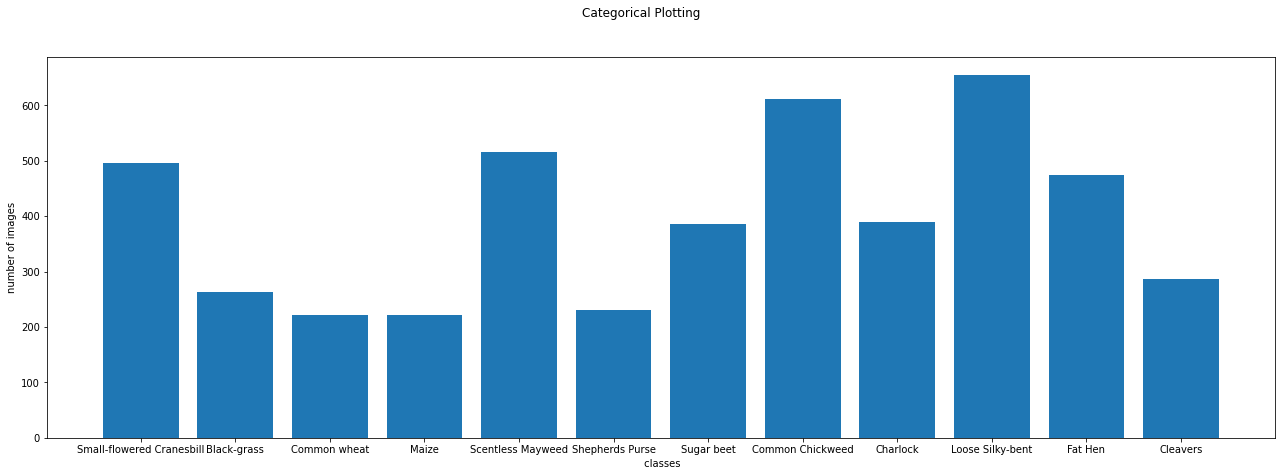

In [20]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [21]:
#MASKING 

def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

#put all together 
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen
#iterate on all images
for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue

In [22]:
#PREPROCESS DATA 
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)
print(y[0])
random_seed = 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=random_seed)
#split test data into 50% test, 50% validation

random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(Y_val.shape)

[0 0 0 0 0 0 0 0 0 1 0 0]
(3325, 256, 256, 3)
(712, 256, 256, 3)
(713, 256, 256, 3)
(3325, 12)
(712, 12)
(713, 12)


In [23]:
#RUN THIS DURING RESNET TRAINING:
import tensorflow as tf
X_train=tf.keras.applications.resnet_v2.preprocess_input(X_train)
X_test=tf.keras.applications.resnet_v2.preprocess_input(X_test)
X_val=tf.keras.applications.resnet_v2.preprocess_input(X_val)

In [24]:
# COMMON CODE 
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
#DATA GENERATOR 
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)
# Recall that our dataset is highly imbalanced. We deal with this
# problem by generating class weights and passing them to the model
# at training time. The model will use the class weights to adjust
# how it trains so that each class is considered equally important to
# get right, even if the actual distribution of images is highly 
# variable.
import os
labels_count = dict()
for img_class in [ic for ic in os.listdir('/content/train/') if ic[0] != '.']:
    labels_count[img_class] = len(os.listdir('/content/train/' + img_class))
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in 
                 enumerate(labels_count.values())}
print(labels_count)
print("Weight of each class is ")
print(class_weights)

{'Shepherds Purse': 231, 'Common Chickweed': 611, 'Loose Silky-bent': 654, 'Cleavers': 287, 'Maize': 221, 'Common wheat': 221, 'Fat Hen': 475, 'Small-flowered Cranesbill': 496, 'Charlock': 390, 'Black-grass': 263, 'Sugar beet': 385, 'Scentless Mayweed': 516}
Weight of each class is 
{0: 20.562770562770563, 1: 7.774140752864157, 2: 7.2629969418960245, 3: 16.550522648083625, 4: 21.493212669683256, 5: 21.493212669683256, 6: 10.0, 7: 9.576612903225806, 8: 12.179487179487179, 9: 18.06083650190114, 10: 12.337662337662337, 11: 9.205426356589147}


In [26]:
from keras.applications import ResNet50V2
from keras.models import Model
import keras
input_shape=(256,256,3)

resnet_pretrained = ResNet50V2(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = resnet_pretrained.layers[-1].output
output = keras.layers.Flatten()(output)

resnet_pretrained_model = Model(resnet_pretrained.input, output)
resnet_pretrained_model.trainable = False

for layer in resnet_pretrained_model.layers:
    layer.trainable = False
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.optimizers import SGD

model = Sequential()
model.add(resnet_pretrained_model)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

model.compile(
    optimizer=SGD(lr=0.1, momentum=0.9, nesterov=True),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
cbs = [Snapshot('snapshots', nb_epochs=10, verbose=1, nb_cycles=3)]
BATCH_SIZE =32
epochs = 15
history = model.fit_generator(datagen.flow(X_train,y_train, BATCH_SIZE),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=len(X_train) // BATCH_SIZE
                              ,class_weight=class_weights, 
                              callbacks=cbs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15


In [ ]:
del model

# Loading the ensemble
print('Loading ensemble...')
keep_last = 2

def load_ensemble(folder, keep_last=None):
    paths = glob.glob(os.path.join(folder, 'weights_cycle_*.h5'))
    print('Found:', ', '.join(paths))
    if keep_last is not None:
        paths = sorted(paths)[-keep_last:]
    print('Loading:', ', '.join(paths))

    x_in = Input(shape=(256, 256, 1))
    outputs = []

    for i, path in enumerate(paths):
        m = get_model(x_in)
        m.load_weights(path)
        outputs.append(m.output)

    shape = outputs[0].get_shape().as_list()
    x = Lambda(lambda x: K.mean(K.stack(x, axis=0), axis=0),
               output_shape=lambda _: shape)(outputs)
    model = Model(inputs=x_in, outputs=x)
    return model

In [ ]:
model = load_ensemble('snapshots')
model.compile(
    optimizer=SGD(lr=0.1, momentum=0.9, nesterov=True),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
metrics = model.evaluate(x_test, y_test)
print(metrics)